In [1]:
%pwd

'/media/drs/extra/Learn/code/mvi'

In [4]:
path = '/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_0_axial.nii'

In [21]:
import os 
import nrrd 
import csv 
import SimpleITK as sitk
import numpy as np 
import nibabel as nib 
import skimage.io as io
import matplotlib.pyplot as plt

In [16]:
image = nib.load(path)
print(image)
# print(image.header['db_name'])
# print(image.header)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (512, 512, 88)
affine: 
[[ -0.78130001   0.           0.         186.73100281]
 [  0.          -0.78130001   0.         200.77999878]
 [  0.           0.           2.29999924 -57.83409882]
 [  0.           0.           0.           1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  88   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.7813    0.7813    2.2999992 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration 

In [19]:
image_array = image.get_data()
print(type(image_array))
print(image_array.shape)

<class 'numpy.memmap'>
(512, 512, 88)


In [20]:
image_2d = image_array[:,:,50]
print(image_2d)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


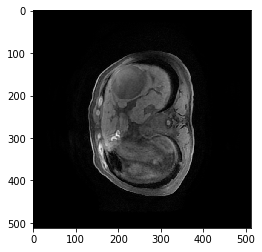

In [22]:
plt.imshow(image_2d, cmap='gray')
plt.show()

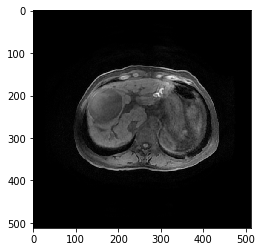

In [23]:
plt.imshow(image_2d.transpose((1, 0)), cmap='gray')
plt.show()

In [39]:
image_2d = image_2d.transpose((1, 0))

In [24]:
mask_path = '/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_0_axial_NC.nrrd'

In [26]:
mask_data, _ = nrrd.read(mask_path)
print(mask_data.shape)

(512, 512, 88)


In [28]:
mask_slice = list(set(np.nonzero(mask_data)[-1]))
print(mask_slice)

[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]


In [32]:
print(np.nonzero(mask_data[:,:,50]))

(array([130, 130, 130, ..., 210, 210, 210]), array([226, 227, 228, ..., 222, 223, 224]))


In [33]:
print(mask_data[130, 226, 50])

1


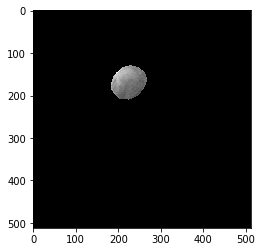

In [41]:
mask_image = np.multiply(image_2d, mask_data[:,:,50])
plt.imshow(mask_image, cmap='gray')
plt.show()

In [42]:
path = '/home/drs/Desktop/mvi_data/MVI'

In [46]:
for case in os.listdir(path):
#     print(case)
    case_path = os.path.join(path, case)
#     print(case_path)
    case2_path = os.path.join(case_path, os.listdir(case_path)[0])
    print(case2_path)

/home/drs/Desktop/mvi_data/MVI/2081487/4832691
/home/drs/Desktop/mvi_data/MVI/4724952/4713989
/home/drs/Desktop/mvi_data/MVI/3807435/3481089
/home/drs/Desktop/mvi_data/MVI/4034320/3804995
/home/drs/Desktop/mvi_data/MVI/8130824/3136764
/home/drs/Desktop/mvi_data/MVI/3265726/2645836
/home/drs/Desktop/mvi_data/MVI/3628724/3236501
/home/drs/Desktop/mvi_data/MVI/2945564/2224482


In [49]:
import glob
case_list = glob.glob('/home/drs/Desktop/mvi_data/MVI/*/*')
print(case_list)

['/home/drs/Desktop/mvi_data/MVI/2081487/4832691', '/home/drs/Desktop/mvi_data/MVI/4724952/4713989', '/home/drs/Desktop/mvi_data/MVI/3807435/3481089', '/home/drs/Desktop/mvi_data/MVI/4034320/3804995', '/home/drs/Desktop/mvi_data/MVI/8130824/3136764', '/home/drs/Desktop/mvi_data/MVI/3265726/2645836', '/home/drs/Desktop/mvi_data/MVI/3628724/3236501', '/home/drs/Desktop/mvi_data/MVI/2945564/2224482']


In [50]:
case_list[0]

'/home/drs/Desktop/mvi_data/MVI/2081487/4832691'

In [55]:
LAVA_list = glob.glob(case_list[0] + '/*LAVA*')
LAVA_list.sort()
for i in LAVA_list:
    print(i)

/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_0_axial.nii
/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_0_axial_NC.nrrd
/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_0_axial_NC_liver.nrrd
/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_1_axial.nii
/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_1_axial_ART.nrrd
/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_1_axial_ART_liver.nrrd
/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_2_axial.nii
/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_2_axial_PV.nrrd
/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_2_axial_PV_liver.nrrd
/home/drs/Desktop/mvi_data/MVI/2081487/4832691/2081487_4832691_BH_Ax_LAVA+C_4_0_3_axial.nii
/home/drs/Desktop/mvi_data/MVI/20814